In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("weight-height.csv")

In [13]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
# lest drop the weighst and work with only heights

# Assuming df is your DataFrame
df = df.drop(columns="Weight")
# df.head(5)

In [15]:
df.head(5)

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [37]:
df.shape

(10000, 2)

## METHOD 1 : STD 

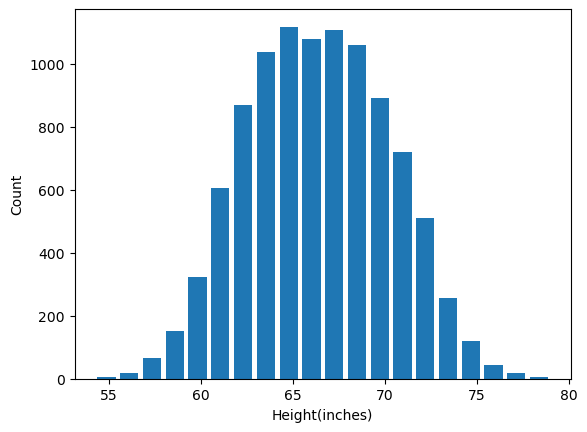

In [18]:
# plot the hist

plt.hist(df.Height , bins = 20 , rwidth = 0.8)
plt.xlabel("Height(inches)")
plt.ylabel("Count")
plt.show()

In [22]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

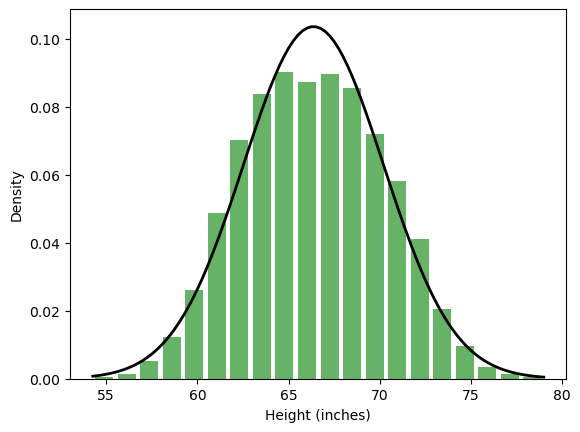

In [30]:
from scipy.stats import norm 

plt.hist(df.Height, bins=20, density=True, alpha=0.6, color='g', rwidth=0.8)
plt.xlabel("Height (inches)")
plt.ylabel("Density")

mu, std = df.Height.mean() , df.Height.std()
# print(mu,std)

xmin, xmax = df.Height.min() , df.Height.max()
# print(xmin,xmax)

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Probability density function

plt.plot(x, p, 'k', linewidth=2) # k = black 
plt.show()


In [31]:
# clearly the above one is a normal distrbution -> BELL CURVE

# MAKE A THRESHOLD NOW

# we use 3 std to remove the outliers 
# Z -score will give the "exact value" of how the data is from the stdv 

max_lim = df.Height.mean() + 3*df.Height.std()
min_lim = df.Height.mean() - 3*df.Height.std()

print(max_lim)
print(min_lim)

 

77.91014411714094
54.82497539250154


In [36]:
# so remove the values which lies beyond this range

df2 = df [(df.Height>min_lim) & (df.Height<max_lim)]
print(df.shape)
print(df2.shape)


(10000, 2)
(9993, 2)


## METHOD 2 : Z-SCORE

In [43]:
## z - score  = (x-u)/std

# create a new col z- score and each values will have a z score 

df2["z-score"] = (df2.Height-df2.Height.mean())/df2.Height.std()

df2.head(5)

/tmp/ipykernel_60980/1477066426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["z-score"] = (df2.Height-df2.Height.mean())/df2.Height.std()


,Gender,Height,z-score
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202


In [45]:
# same method as before 

# just filter the data points whose z -score is less than 3 

df3 = df2[(df2["z-score"]>-3) & (df2['z-score']<3)]

df3.head(5)

,Gender,Height,z-score
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
